In [5]:
# CS180 (CS280A): Project 1 starter Python code

# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [27]:
norms = []
nccs = []
def align(img, goal, pyramid=True):
    """
    Returns img such that it is aligned according to goal
    """
    estimate_i, estimate_j = 0, 0
    if img.shape[0] > 100 and pyramid: # if the image is too big, we need to downsample it. also assume nearly square.
        img_downsampled = sk.transform.rescale(img, 0.5)
        goal_downsampled = sk.transform.rescale(goal, 0.5)
        _, estimate_i, estimate_j = align(img_downsampled, goal_downsampled, pyramid=pyramid)
        estimate_i *= 2
        estimate_j *= 2
        print(f"estimate_i: {estimate_i}, estimate_j: {estimate_j}, img_shape: {img.shape}")

    best_img, best_i, best_j = None, None, None
    best_metric = float("inf")
    search_range = 3
    stride = 1
    for i in trange(-search_range*stride + estimate_i, search_range*stride + estimate_i, stride):
        for j in range(-search_range*stride + estimate_j, search_range*stride + estimate_j, stride):
            shifted_img = np.roll(img, shift=(i, j), axis=(0, 1))
            cropped_shifted_img = shifted_img[int(0.1*shifted_img.shape[0]):int(0.9*shifted_img.shape[0]), int(0.1*shifted_img.shape[1]):int(0.9*shifted_img.shape[1])]
            cropped_goal = goal[int(0.1*goal.shape[0]):int(0.9*goal.shape[0]), int(0.1*goal.shape[1]):int(0.9*goal.shape[1])]
            metric = np.sqrt(np.sum(np.sum((cropped_shifted_img - cropped_goal)**2)))
            norms.append(metric)
            cropped_shifted_img_flat, cropped_goal_flat = cropped_shifted_img.flatten(), cropped_goal.flatten()
            metric2 = np.dot(cropped_shifted_img_flat/np.linalg.norm(cropped_shifted_img_flat), cropped_goal_flat/np.linalg.norm(cropped_goal_flat))
            nccs.append(metric2)
            metric = metric/metric2
            if metric < best_metric:
                best_metric = metric
                best_img = shifted_img
                best_i, best_j = i, j
    return best_img, best_i, best_j

def align_pyramid(img, goal):
    """
    Performs a image pyramid style alignment search.
    At increasing scales, uses align(), feeds the results of the previous align into the next
    """

(3231, 3719)


100%|██████████| 6/6 [00:00<00:00, 1979.53it/s]


estimate_i: 0, estimate_j: 0, img_shape: (101, 116)


100%|██████████| 6/6 [00:00<00:00, 1386.47it/s]


estimate_i: 2, estimate_j: 2, img_shape: (202, 232)


100%|██████████| 6/6 [00:00<00:00, 307.89it/s]


estimate_i: 4, estimate_j: 2, img_shape: (404, 465)


100%|██████████| 6/6 [00:00<00:00, 130.81it/s]


estimate_i: 10, estimate_j: 6, img_shape: (808, 930)


100%|██████████| 6/6 [00:00<00:00, 31.80it/s]


estimate_i: 18, estimate_j: 10, img_shape: (1616, 1860)


100%|██████████| 6/6 [00:00<00:00,  6.67it/s]


estimate_i: 38, estimate_j: 20, img_shape: (3231, 3719)


100%|██████████| 6/6 [00:00<00:00, 2172.09it/s]


estimate_i: 2, estimate_j: 0, img_shape: (101, 116)


100%|██████████| 6/6 [00:00<00:00, 1442.83it/s]


estimate_i: 4, estimate_j: 2, img_shape: (202, 232)


100%|██████████| 6/6 [00:00<00:00, 301.72it/s]


estimate_i: 10, estimate_j: 4, img_shape: (404, 465)


100%|██████████| 6/6 [00:00<00:00, 127.53it/s]


estimate_i: 20, estimate_j: 8, img_shape: (808, 930)


100%|██████████| 6/6 [00:00<00:00, 30.64it/s]


estimate_i: 38, estimate_j: 18, img_shape: (1616, 1860)


100%|██████████| 6/6 [00:00<00:00,  6.53it/s]


estimate_i: 76, estimate_j: 36, img_shape: (3231, 3719)


100%|██████████| 6/6 [00:06<00:00,  1.00s/it]


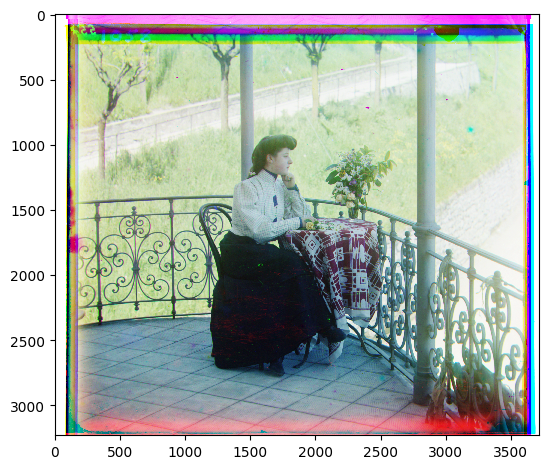

In [29]:
# name of the input file
imname = 'data/italil.tif'

# read in the image
im = skio.imread(imname)

# convert to double (might want to do this later on to save memory)    
im = sk.img_as_float(im)
    
# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]
print(b.shape)
# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)

ag = align(g, b)[0]
ar = align(r, b)[0]
# create a color image
im_out = np.dstack([ar, ag, b])

# save the image
fname = 'results/out_fname.jpg'
#skio.imsave(fname, im_out)

# display the image
skio.imshow(im_out)
skio.show()

In [74]:
b.shape

(341, 391)

In [22]:
color = ['g' if i < len(norms)/2 else 'r' for i in range(len(norms))]

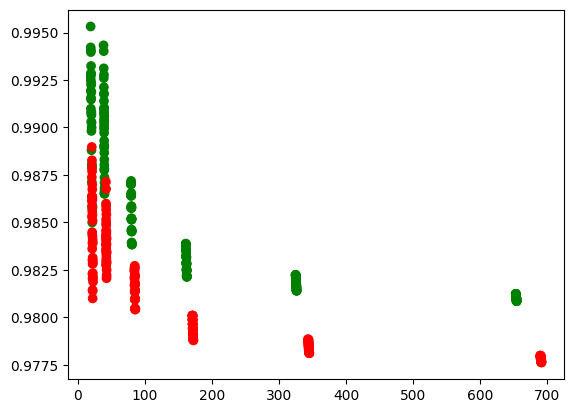

In [23]:
plt.scatter(norms, nccs, color=color)
plt.show()
# looks like the two curves are r and g, and they're monotonically related.

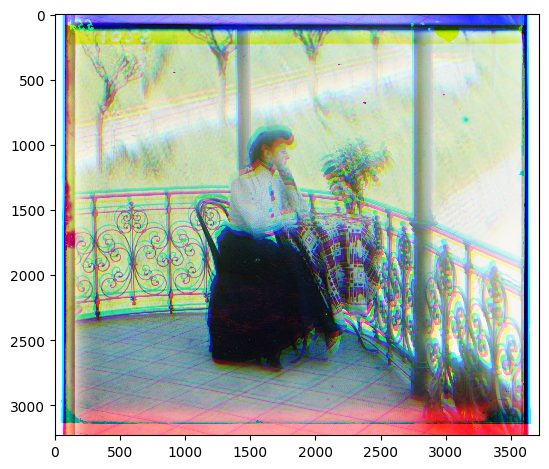

In [30]:
im_out = np.dstack([r, g, b])

# save the image
fname = 'results/out_fname.jpg'
#skio.imsave(fname, im_out)

# display the image
skio.imshow(im_out)
skio.show()

In [19]:
b_flat, g_flat = b.flatten(), g.flatten()
np.dot(b_flat/np.linalg.norm(b_flat), g_flat/np.linalg.norm(g_flat))

0.9465291629419613

In [34]:
b_flat, ag_flat = b.flatten(), ag.flatten()
np.dot(b_flat/np.linalg.norm(b_flat), ag_flat/np.linalg.norm(ag_flat))

0.9477895420600555

In [30]:
np.sqrt(np.sum(np.sum((b - g)**2)))

70.44953410105525

In [33]:
np.sqrt(np.sum(np.sum((b - ag)**2)))

69.67737615183887

In [56]:
b

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.99607843, 0.98823529,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99215686],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.98823529]])